In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
df_hikes = pd.read_csv('data/WTA_all_trail_data_clean.csv', lineterminator='\n')

In [ ]:
df_hikes.head()

In [ ]:
df_neighbors = df[['Votes','Trail','Date_type','condition|snow','condition|trail','condition|bugs','condition|road','elevation_gain','highest_point','lat','long','numReports','super_region','sub_region','total_distance']]

In [ ]:
df_neighbors

In [ ]:
df_neighbors['Date_type'] = df_neighbors['Date_type'].apply(lambda x: pd.to_datetime(x))

In [ ]:
df_neighbors['month'] = df_neighbors['Date_type'].apply(lambda x: x.month)
df_neighbors['year']= df_neighbors['Date_type'].apply(lambda x: x.year)

In [ ]:
len(df_neighbors['Trail'].unique())

In [ ]:
math.sqrt(189)

In [ ]:
k = 13

In [ ]:
lat_med = 47.7748
long_med = -123.1038

In [ ]:
df_oly =df_hikes.loc[df_hikes['sub_region'] == ' Hood Canal']

In [ ]:
df_oly

In [ ]:
df_oly.loc[df_oly['hike_name']=='Mount Rose']['lat']
list(df_oly['hike_name'].unique())

In [2]:
# Haversine formula example in Python
# Author: Wayne Dyck

import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [3]:
def find_hike_distances(df,trail_name):
    lat1 = df.loc[df['hike_name']== trail_name]['lat']
    lon1 = df.loc[df['hike_name']== trail_name]['long']
    origin = float(lat1),float(lon1)
    all_hikes = list(df['hike_name'].unique())
    distances = []
    for hike in all_hikes:
        lat2 = df.loc[df['hike_name']== hike]['lat']
        lon2 = df.loc[df['hike_name']== hike]['long']
        destination = float(lat2),float(lon2)
        distances.append(distance(origin,destination))
    return distances
        
    
    

In [4]:
def distance_from_median(df):
    lat2 = 47.7748
    lon2 = -123.1038
    destination = lat2,lon2
    all_hikes = list(df['hike_name'].unique())
    distances = []
    for hike in all_hikes:
        lat1 = df.loc[df['hike_name']== hike]['lat']
        lon1 = df.loc[df['hike_name']== hike]['long']
        origin = float(lat1),float(lon1)
        distances.append(distance(origin,destination))
    df['distance_from_median']= distances
    

In [ ]:

neigh = KNeighborsClassifier(n_neighbors=10)
X = df['highest_point']
X['distance_from_'] = find_hike_distances(df,trail_name)
y = df['']

In [ ]:
df_oly['test_distance'] = find_hike_distances(df_oly,'Mount Rose')

In [ ]:
df_oly

In [4]:
df_h = pd.read_csv("data/new_hood_canal_merged.csv", sep = '|',lineterminator='\n')

In [105]:
df_h

,Unnamed: 0,Unnamed: 0_x,Creator,Date,Report,Trail,Votes,_id,last_year,last_month,month,year,monthyear,condition|snow,condition|trail,condition|bugs,condition|road,Anderson Lake State Park,Anderson Point,Appleton Pass,Aurora Creek,Baldy,Banner Forest,Barnes Creek,Big Cedar Tree - Quinault,Big Creek,Big Tree Trail,Blue Mountain - Deer Park Snowshoe,Bogachiel Peak,Bogachiel River,Boulder Lake (Olympics),Buckhorn Mountain,Burfoot Park,Cape Alava,Cape Alava Loop (Ozette Triangle),Cape Flattery,Capitol State Forest - Capitol Peak,Capitol State Forest - McLane Creek,Capitol State Forest - Mount Molly,Capitol State Forest - Rock Candy Mountain,Capitol State Forest - Sherman Creek Loop,Cascade Rock,Church Creek,Clear Creek Trail,Colonel Bob Trail - Colonel Bob Peak,Constance Pass,Copper Creek,Cub Peak,Deadfall,Deer Park to Maiden Peak,Deer Ridge,Dirty Face Ridge,Dodger Point,Dosewallips River Road,Dosewallips State Park - Steam Donkey Trail,Dry Creek,Duckabush River,Dungeness Spit,Eagle Point Snowshoe,Elbo Creek,Elk Lakes,Elk Mountain to Maiden Peak,Elwha River and Geyser Valley,Elwha River and Lillian River,Elwha To Hurricane Hill,Fallsview Canyon (Falls View),Fletcher Canyon,Fort Flagler State Park,Foulweather Bluff Preserve Trail,Gibbs Lake,Gladys Divide,Glines Canyon Overlook Trail,Gold Mountain,Grand Ridge,Grand Valley,Grand Valley via Grand Pass Trail,Graves Creek,Green Mountain - Gold Creek Trail,Green Mountain - Wildcat Trail,Griff Creek,Guillemot Cove,Hall of Mosses,Hansville Greenway,Happy Lake Ridge,Harstine Island State Park,Heart O' the Forest,Heather Creek Trail via Upper Dungeness River,Heather Park,High Divide - Seven Lakes Basin Loop,Hoh River Trail to Blue Glacier,Hoh River Trail to Five Mile Island,Home Lake,Hurricane Hill,Hurricane Ridge Snowshoe,Illahee Forest Preserve,Indian Island County Park,Jefferson Ridge,Kalaloch - Browns Point,Kalaloch Creek Nature Trail,Kestner Homestead,Klahhane Ridge,Klahhane Ridge Snowshoe,Kloshe Nanitch,Kopachuck State Park Trail,Lake Angeles,Lake Constance,Lake of the Angels,Lena Lake,Lena Lake - Valley of Silent Men Snowshoe,Lightning Peak,Lillian Ridge,Lillian River,Little Quilcene River,Lower Big Quilcene River,Lower Dungeness River,Lower Gray Wolf River,Lower Pete's Creek,Lower South Fork Skokomish River,Marmot Pass - Upper Big Quilcene,Marmot Pass via Upper Dungeness River Trail,Mary E. Theler Wetlands Nature Preserve,Marymere Falls,McCormick Forest Park,Mildred Lakes,Miller Peninsula-Thompson Spit,Millersylvania State Park,Mima Mounds,Mink Lake,Mink Lake to Little Divide,Mount Angeles,Mount Angeles Snowshoe,Mount Ellinor,Mount Jupiter,Mount Muller,Mount Rose,Mount Storm King,Mount Townsend,Mount Townsend - Silver Lakes Traverse,Mount Townsend Snowshoe,Mount Walker,Mount Zion,Murhut Falls,Ned Hill,Newberry Hill Heritage Park,North Coast Route,North Fork Quinault River and Halfway House,North Fork Skokomish River,North Fork Skokomish River and Flapjack Lakes,North Fork Sol Duc River,Notch Pass,Olympic Hot Springs,PJ Lake,Peabody Creek Trail,Penrose Point State Park,Pete's Creek - Colonel Bob Peak,Priest Point Park,Pyramid Mountain / Pyramid Peak,Queets Campground Loop,Queets River,Quillayute River Slough,Quinault National Recreation Trails,Quinault River-Pony Bridge-Enchanted Valley,Rain Shadow Loop,Ranger Hole - Interrorem Nature Trail,Royal Basin - Royal Lake,Ruby Beach,Second Beach,Shi Shi Beach and Point of the Arches,Silver Lakes,Six Ridge,Slab Camp Creek and Gray Wolf River,Smokey Bottom (West Lake Mills),Snider-Jackson Traverse,Sol Duc Falls,South Coast Wilderness Trail - Toleak Point,South Fork Hoh River - Big Flat,Spider Lake,Spoon Creek Falls,Spruce Railroad Trail,Staircase Rapids,Striped Peak,Sunnybrook Meadows,Switchback,The Brothers,Third Beach,Three Lakes,Tubal Cain Mine,Tubal Cain Mine to Buckhorn Lake,Tumwater Falls Park,Tunnel Creek,Tunnel Creek - Dosewallips Trailhead,Twanoh State Park,Upper Dungeness River,Upper Lena Lake,Upper South Fork Skokomish River,Valhall

In [95]:
np.set_printoptions(threshold='nan')

In [37]:
df_h['sub_region'].unique()

array([' Hood Canal', nan], dtype=object)

In [10]:
df_h['Date'] = pd.to_datetime(df_h['Date'],format='%Y-%m-%d')

In [82]:
df_all = df_h[['highest_point','distance_from_median','condition|snow','Trail','Date']]
df_d = df_all.fillna(0)

In [88]:
df_d['month'] = df_d['Date'].apply(lambda x: x.month)
df_d['year'] = df_d['Date'].apply(lambda x: x.year)

In [97]:
neigh = KNeighborsClassifier(n_neighbors=20)
X = df_d[['highest_point','distance_from_median','month']]
y = df_d['condition|snow']
y = y.astype(bool)

In [98]:
X_s = normalize(scale(X))
X_s

array([[ 0.38446961,  0.90304194, -0.1915682 ],
       [ 0.38446961,  0.90304194, -0.1915682 ],
       [ 0.38446961,  0.90304194, -0.1915682 ],
       ..., 
       [-0.26722601,  0.84077864,  0.47083068],
       [-0.26319071,  0.8280823 , -0.49498521],
       [-0.24190641,  0.76111508, -0.60181818]])

In [99]:
neigh.fit(X_s,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [104]:
all_n = neigh.kneighbors()
averages = []
for idx_neighbors in all_n[1]:
    neighbors = df_d.iloc[idx_neighbors]
    averages.append(neighbors['condition|snow'].mean())
df_h['neighbors_average'] = averages

In [77]:
n1 = [130, 220, 257, 146,   1,   0,   2,  45, 248,  93]
n2 = [146, 131, 228,  43,  93, 227, 167,  42,   0,   2, 257, 220, 242,
        244,  95, 245, 248, 130,   1,  45]
n3 = [7375, 7266, 7217, 7331, 7385, 7218, 7349, 7330, 7268, 7219, 7351,
        7185, 7350, 7267, 7303, 6412, 6423, 7270, 7273, 7272]
n4= [257,  88, 242, 131,  93, 228,  43,  42,   2, 220, 227, 167, 244,
       245,  95, 248,  45,   1, 146, 130]
df_t = df_d.iloc[n4]
df_t

,highest_point,distance_from_median,condition|snow,Trail,Date,month,year
257,4301.0,33.383575,False,Mount Rose,2001-05-13,5,2001
88,4301.0,33.383575,False,Mount Rose,2016-05-30,5,2016
242,4301.0,33.383575,False,Mount Rose,2007-05-01,5,2007
131,4301.0,33.383575,False,Mount Rose,2015-05-09,5,2015
93,4301.0,33.383575,False,Mount Rose,2016-05-13,5,2016
228,4301.0,33.383575,True,Mount Rose,2009-05-25,5,2009
43,4301.0,33.383575,True,Mount Rose,2017-05-18,5,2017
42,4301.0,33.383575,True,Mount Rose,2017-05-29,5,2017
2,4301.0,33.383575,True,Mount Rose,2018-05-05,5,2018
220,4301.0,33.383575,True,Mount Rose,2010-05-31,5,2010


In [66]:
df_t['condition|snow'].mean()

0.25

In [108]:
keys = ['Global_sum_FIPS:53031 FIPS:53009.csv','Global_sum_FIPS:53045 FIPS:53027.csv']
#imports weather and cleans
df_all_weather = get_weather_as_df(keys)
df_weather_clean = clean_weather_df(df_all_weather)
df_weather_distances = df_weather_clean[['LATITUDE','LONGITUDE','name']].drop_duplicates().reset_index()
get_closest_station(df_h,df_weather_distances)
#merge and save full df
df_hikeweather = merge_weather_trails(df_weather_clean,df_h)

In [106]:
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, atan2, radians
from io import BytesIO
import boto3

#get weather and prep for merge
def get_weather_as_df(keys):
    """Uses keys to import all weather csvs, downloaded from national weather association
    **Input parameters**
    ------------------------------------------------------------------------------
    keys: list. All links for weather saved in s3
    **Output**
    ------------------------------------------------------------------------------
    csv: pandas df. All opened csvs as a df
    """
    s3 = boto3.client('s3')
    bucket_name = 'trailreportdata'
    files = b''
    for key in keys:
        response = s3.get_object(Bucket= bucket_name, Key= key)
        body = response['Body']
        csv = body.read()
        files+= csv
    f = BytesIO(files)
    csv = pd.read_csv(f)
    return csv

def get_hike_distance(df1lat, df1long,df2lat, df2long):
    """
    **Input parameters**
    ------------------------------------------------------------------------------
    df1lat: int.
    df1long: int.
    df2lat: int.
    df2long: int.
    all inputs are pulled from lat and long in the df
    **Output**
    ------------------------------------------------------------------------------
    distance: int. distance between two points in km
    """
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(df1lat)
    lon1 = radians(df1long)
    lat2 = radians(df2lat)
    lon2 = radians(df2long)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

def get_closest_station(df_hike,df_weather):
    """
    Calls get_hike_distance on each hike for each weather station.
    Adds columns to df_hike

    **Input parameters**
    ------------------------------------------------------------------------------
    df_hike: pandas df
    df_weather: pandas df
    **Output**
    ------------------------------------------------------------------------------
    None. Adds columns to df_hike: closest station and station_distance
    """
    closest_station = []
    station_distance = []
    for hike_idx in df_hike.index:
        hike_long = df_hike.loc[hike_idx,'long']
        hike_lat = df_hike.loc[hike_idx,'lat']
        distances = []
        for stat_idx in df_weather.index:
            stat_long = df_weather.loc[stat_idx,'LONGITUDE']
            stat_lat = df_weather.loc[stat_idx,'LATITUDE']
            distance = get_hike_distance(hike_lat, hike_long,stat_lat, stat_long)
            distances.append(distance)
        shortest_idx = np.argmax(distances)
        distance = max(distances)
        station = df_weather.loc[int(shortest_idx),'name']
        closest_station.append(station)
        station_distance.append(distance)
    df_hike['closet_station'] = closest_station
    df_hike['station_distance'] = station_distance


def clean_weather_df(weather_df):
    """
    Takes the weather_df and returns a dataframe with the station name
    and numeric weather

    **Input parameters**
    ------------------------------------------------------------------------------
    weather_df: pandas df
    **Output**
    ------------------------------------------------------------------------------
    all_weatherdf: pandas df
    """
    col = weather_df.columns
    drop_col = list(col[7::2])
    clean_num = weather_df.drop(319, axis=0)
    num_weather = clean_num.drop(drop_col,axis=1)
    just_num = num_weather.drop(['NAME','STATION'], axis=1)
    all_weatherdf = just_num.apply(pd.to_numeric)
    all_weatherdf['name']= num_weather['NAME']
    return all_weatherdf

#merge all trails together

def merge_trail_files(df_trail,df_report):
    """
    This function left joins trails and reports, adding trail data to the report you built
    **Input parameters**
    ------------------------------------------------------------------------------
    df_trail: pandas df
    df_report: pandas df
    **Output**
    ------------------------------------------------------------------------------
    Merged: Pandas df of reports with added trail information
    """

    # df_reports = df_report.drop('Unnamed: 0',axis =1)
    # df_trails = df_trail.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
    merged = pd.merge(df_report, df_trail, left_on='Trail', right_on='hike_name', how='left', sort=False)
    return merged

#to use wheneber reopened as a csv
def change_datetime(df_all):
    """ take the dateframe and turns the Datetime catagory into datetime form"""
    df_all['Datetime'] = df_all['Date'].apply(lambda x: pd.to_datetime(x))
    return df_all

def merge_weather_trails(df_weather,df_hike):
    """ Adds weather info to df_hike"""
    df_trail_year = pd.merge(df_hike, df_weather, how='left', left_on=['closet_station','last_year'], right_on= ['name','DATE'])
    df_all_clean = df_trail_year.drop(['Date','DATE','name'], axis =1)
    return df_all_clean

In [110]:
df_hikeweather

,Unnamed: 0,Unnamed: 0_x,Creator,Report,Trail,Votes,_id,last_year,last_month,month,year,monthyear,condition|snow,condition|trail,condition|bugs,condition|road,Anderson Lake State Park,Anderson Point,Appleton Pass,Aurora Creek,Baldy,Banner Forest,Barnes Creek,Big Cedar Tree - Quinault,Big Creek,Big Tree Trail,Blue Mountain - Deer Park Snowshoe,Bogachiel Peak,Bogachiel River,Boulder Lake (Olympics),Buckhorn Mountain,Burfoot Park,Cape Alava,Cape Alava Loop (Ozette Triangle),Cape Flattery,Capitol State Forest - Capitol Peak,Capitol State Forest - McLane Creek,Capitol State Forest - Mount Molly,Capitol State Forest - Rock Candy Mountain,Capitol State Forest - Sherman Creek Loop,Cascade Rock,Church Creek,Clear Creek Trail,Colonel Bob Trail - Colonel Bob Peak,Constance Pass,Copper Creek,Cub Peak,Deadfall,Deer Park to Maiden Peak,Deer Ridge,Dirty Face Ridge,Dodger Point,Dosewallips River Road,Dosewallips State Park - Steam Donkey Trail,Dry Creek,Duckabush River,Dungeness Spit,Eagle Point Snowshoe,Elbo Creek,Elk Lakes,Elk Mountain to Maiden Peak,Elwha River and Geyser Valley,Elwha River and Lillian River,Elwha To Hurricane Hill,Fallsview Canyon (Falls View),Fletcher Canyon,Fort Flagler State Park,Foulweather Bluff Preserve Trail,Gibbs Lake,Gladys Divide,Glines Canyon Overlook Trail,Gold Mountain,Grand Ridge,Grand Valley,Grand Valley via Grand Pass Trail,Graves Creek,Green Mountain - Gold Creek Trail,Green Mountain - Wildcat Trail,Griff Creek,Guillemot Cove,Hall of Mosses,Hansville Greenway,Happy Lake Ridge,Harstine Island State Park,Heart O' the Forest,Heather Creek Trail via Upper Dungeness River,Heather Park,High Divide - Seven Lakes Basin Loop,Hoh River Trail to Blue Glacier,Hoh River Trail to Five Mile Island,Home Lake,Hurricane Hill,Hurricane Ridge Snowshoe,Illahee Forest Preserve,Indian Island County Park,Jefferson Ridge,Kalaloch - Browns Point,Kalaloch Creek Nature Trail,Kestner Homestead,Klahhane Ridge,Klahhane Ridge Snowshoe,Kloshe Nanitch,Kopachuck State Park Trail,Lake Angeles,Lake Constance,Lake of the Angels,Lena Lake,Lena Lake - Valley of Silent Men Snowshoe,Lightning Peak,Lillian Ridge,Lillian River,Little Quilcene River,Lower Big Quilcene River,Lower Dungeness River,Lower Gray Wolf River,Lower Pete's Creek,Lower South Fork Skokomish River,Marmot Pass - Upper Big Quilcene,Marmot Pass via Upper Dungeness River Trail,Mary E. Theler Wetlands Nature Preserve,Marymere Falls,McCormick Forest Park,Mildred Lakes,Miller Peninsula-Thompson Spit,Millersylvania State Park,Mima Mounds,Mink Lake,Mink Lake to Little Divide,Mount Angeles,Mount Angeles Snowshoe,Mount Ellinor,Mount Jupiter,Mount Muller,Mount Rose,Mount Storm King,Mount Townsend,Mount Townsend - Silver Lakes Traverse,Mount Townsend Snowshoe,Mount Walker,Mount Zion,Murhut Falls,Ned Hill,Newberry Hill Heritage Park,North Coast Route,North Fork Quinault River and Halfway House,North Fork Skokomish River,North Fork Skokomish River and Flapjack Lakes,North Fork Sol Duc River,Notch Pass,Olympic Hot Springs,PJ Lake,Peabody Creek Trail,Penrose Point State Park,Pete's Creek - Colonel Bob Peak,Priest Point Park,Pyramid Mountain / Pyramid Peak,Queets Campground Loop,Queets River,Quillayute River Slough,Quinault National Recreation Trails,Quinault River-Pony Bridge-Enchanted Valley,Rain Shadow Loop,Ranger Hole - Interrorem Nature Trail,Royal Basin - Royal Lake,Ruby Beach,Second Beach,Shi Shi Beach and Point of the Arches,Silver Lakes,Six Ridge,Slab Camp Creek and Gray Wolf River,Smokey Bottom (West Lake Mills),Snider-Jackson Traverse,Sol Duc Falls,South Coast Wilderness Trail - Toleak Point,South Fork Hoh River - Big Flat,Spider Lake,Spoon Creek Falls,Spruce Railroad Trail,Staircase Rapids,Striped Peak,Sunnybrook Meadows,Switchback,The Brothers,Third Beach,Three Lakes,Tubal Cain Mine,Tubal Cain Mine to Buckhorn Lake,Tumwater Falls Park,Tunnel Creek,Tunnel Creek - Dosewallips Trailhead,Twanoh State Park,Upper Dungeness River,Upper Lena Lake,Upper South Fork Skokomish River,Valhalla Pea

In [144]:
df_t = df_hikeweather.drop(['Unnamed: 0','Unnamed: 0_x','Creator','Trail','Report','Votes','_id','last_month','month','year','Unnamed: 0_y','hike_name','url','super_region','sub_region','closet_station','monthyear','which_pass'], axis=1)

In [145]:
df_tc= df_t.fillna(0)

In [146]:
df_tc

,last_year,condition|snow,condition|trail,condition|bugs,condition|road,Anderson Lake State Park,Anderson Point,Appleton Pass,Aurora Creek,Baldy,Banner Forest,Barnes Creek,Big Cedar Tree - Quinault,Big Creek,Big Tree Trail,Blue Mountain - Deer Park Snowshoe,Bogachiel Peak,Bogachiel River,Boulder Lake (Olympics),Buckhorn Mountain,Burfoot Park,Cape Alava,Cape Alava Loop (Ozette Triangle),Cape Flattery,Capitol State Forest - Capitol Peak,Capitol State Forest - McLane Creek,Capitol State Forest - Mount Molly,Capitol State Forest - Rock Candy Mountain,Capitol State Forest - Sherman Creek Loop,Cascade Rock,Church Creek,Clear Creek Trail,Colonel Bob Trail - Colonel Bob Peak,Constance Pass,Copper Creek,Cub Peak,Deadfall,Deer Park to Maiden Peak,Deer Ridge,Dirty Face Ridge,Dodger Point,Dosewallips River Road,Dosewallips State Park - Steam Donkey Trail,Dry Creek,Duckabush River,Dungeness Spit,Eagle Point Snowshoe,Elbo Creek,Elk Lakes,Elk Mountain to Maiden Peak,Elwha River and Geyser Valley,Elwha River and Lillian River,Elwha To Hurricane Hill,Fallsview Canyon (Falls View),Fletcher Canyon,Fort Flagler State Park,Foulweather Bluff Preserve Trail,Gibbs Lake,Gladys Divide,Glines Canyon Overlook Trail,Gold Mountain,Grand Ridge,Grand Valley,Grand Valley via Grand Pass Trail,Graves Creek,Green Mountain - Gold Creek Trail,Green Mountain - Wildcat Trail,Griff Creek,Guillemot Cove,Hall of Mosses,Hansville Greenway,Happy Lake Ridge,Harstine Island State Park,Heart O' the Forest,Heather Creek Trail via Upper Dungeness River,Heather Park,High Divide - Seven Lakes Basin Loop,Hoh River Trail to Blue Glacier,Hoh River Trail to Five Mile Island,Home Lake,Hurricane Hill,Hurricane Ridge Snowshoe,Illahee Forest Preserve,Indian Island County Park,Jefferson Ridge,Kalaloch - Browns Point,Kalaloch Creek Nature Trail,Kestner Homestead,Klahhane Ridge,Klahhane Ridge Snowshoe,Kloshe Nanitch,Kopachuck State Park Trail,Lake Angeles,Lake Constance,Lake of the Angels,Lena Lake,Lena Lake - Valley of Silent Men Snowshoe,Lightning Peak,Lillian Ridge,Lillian River,Little Quilcene River,Lower Big Quilcene River,Lower Dungeness River,Lower Gray Wolf River,Lower Pete's Creek,Lower South Fork Skokomish River,Marmot Pass - Upper Big Quilcene,Marmot Pass via Upper Dungeness River Trail,Mary E. Theler Wetlands Nature Preserve,Marymere Falls,McCormick Forest Park,Mildred Lakes,Miller Peninsula-Thompson Spit,Millersylvania State Park,Mima Mounds,Mink Lake,Mink Lake to Little Divide,Mount Angeles,Mount Angeles Snowshoe,Mount Ellinor,Mount Jupiter,Mount Muller,Mount Rose,Mount Storm King,Mount Townsend,Mount Townsend - Silver Lakes Traverse,Mount Townsend Snowshoe,Mount Walker,Mount Zion,Murhut Falls,Ned Hill,Newberry Hill Heritage Park,North Coast Route,North Fork Quinault River and Halfway House,North Fork Skokomish River,North Fork Skokomish River and Flapjack Lakes,North Fork Sol Duc River,Notch Pass,Olympic Hot Springs,PJ Lake,Peabody Creek Trail,Penrose Point State Park,Pete's Creek - Colonel Bob Peak,Priest Point Park,Pyramid Mountain / Pyramid Peak,Queets Campground Loop,Queets River,Quillayute River Slough,Quinault National Recreation Trails,Quinault River-Pony Bridge-Enchanted Valley,Rain Shadow Loop,Ranger Hole - Interrorem Nature Trail,Royal Basin - Royal Lake,Ruby Beach,Second Beach,Shi Shi Beach and Point of the Arches,Silver Lakes,Six Ridge,Slab Camp Creek and Gray Wolf River,Smokey Bottom (West Lake Mills),Snider-Jackson Traverse,Sol Duc Falls,South Coast Wilderness Trail - Toleak Point,South Fork Hoh River - Big Flat,Spider Lake,Spoon Creek Falls,Spruce Railroad Trail,Staircase Rapids,Striped Peak,Sunnybrook Meadows,Switchback,The Brothers,Third Beach,Three Lakes,Tubal Cain Mine,Tubal Cain Mine to Buckhorn Lake,Tumwater Falls Park,Tunnel Creek,Tunnel Creek - Dosewallips Trailhead,Twanoh State Park,Upper Dungeness River,Upper Lena Lake,Upper South Fork Skokomish River,Valhalla Peak,Wagonwheel Lake,Watershed Park,Welch Peaks,West Elwha,West Fork Dosewallips River,Wes

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
pd.set_option('display.max_columns', None)
%matplotlib inline

In [147]:
y = df_tc['condition|snow']
all_x = df_tc.drop(['condition|snow', 'condition|trail','condition|bugs','condition|road'], axis = 1)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(all_x, y, test_size=0.33, random_state=22)

In [150]:
model = RandomForestClassifier(n_estimators=500)
fit = model.fit(X_train,y_train)
pred = model.predict_proba(X_test)

In [155]:
pred

array([[ 1.        ,  0.        ],
       [ 0.77      ,  0.23      ],
       [ 1.        ,  0.        ],
       ..., 
       [ 0.132     ,  0.868     ],
       [ 0.96896429,  0.03103571],
       [ 0.9502    ,  0.0498    ]])

In [152]:
feature_values = {}
for i in range(len(model.feature_importances_)):
   feature_values[all_x.columns[i]] = model.feature_importances_[i]

top_features = sorted(feature_values.items(), key=lambda x: x[1], reverse=True)
top_features

[('neighbors_average', 0.4009306220242877),
 ('last_year', 0.15567302516423051),
 ('Hurricane Ridge Snowshoe', 0.02100376744919218),
 ('highest_point', 0.016552148111095653),
 ('elevation_gain', 0.014508430185636637),
 ('DP01', 0.010881569379122968),
 ('DP10', 0.010603071191233205),
 ('total_distance', 0.010568333189336936),
 ('long', 0.010355488985375484),
 ('PRCP', 0.01032262588744565),
 ('stars', 0.010243130295413768),
 ('distance_from_median', 0.0095256019576766115),
 ('numReports', 0.0093471939110911957),
 ('number_votes', 0.0092128635814798087),
 ('station_distance', 0.0087320157198664886),
 ('EMXP', 0.0085944864581005611),
 ('lat', 0.0083526561302148181),
 ('EMXT', 0.0073086397465071283),
 ('TMAX', 0.0073039194597961758),
 ('DX70', 0.0072928197903529843),
 ('HDSD', 0.0069060307718089749),
 ('HTDD', 0.0064589168852451587),
 ('FZF0', 0.0058460848368603177),
 ('FZF1', 0.0054217853303703796),
 ('TAVG', 0.0046086379276256305),
 ('TMIN', 0.0044976077645146207),
 ('CLDD', 0.00447295570

In [159]:
model.classes_

array([False,  True], dtype=bool)

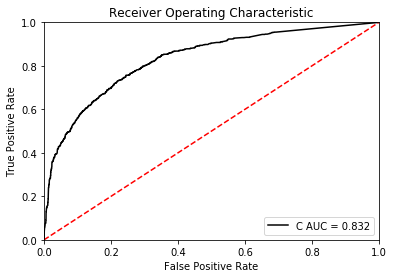

In [160]:
y_true = y_test
y_pred = pred[:,1]

fpr, tpr, threshold = roc_curve(y_true, y_pred)
area_under_curve = auc(fpr, tpr)

# method I: plt
fig, ax = plt.subplots()
plt.title('Receiver Operating Characteristic')
ax.plot(fpr, tpr, 'k', label = 'C AUC = %0.3f' % area_under_curve)

ax.legend(loc = 'lower right')
ax.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()